<a href="https://colab.research.google.com/github/Blebot0/Non-Negative-Matrix-Factorisation-For-Clustering/blob/main/NMF_with_multiplicative_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
'''
  This Function Randomly Initializes weights for the Coefficient and Basis Matrix.

  Todo: Convert this function into a gaussian function for better result
'''
def random_initialization(A,rank):
    number_of_documents = A.shape[0]
    number_of_terms = A.shape[1]
    W = np.random.uniform(1,2,(number_of_documents,rank))
    H = np.random.uniform(1,2,(rank,number_of_terms))
    return W,H

In [ ]:
'''
  Multiplicative Update for Non-negative Matrix Factorisation
'''
def mu_method(A,k,max_iter):
    
    W ,H = random_initialization(A,k)
    norms = []
    e = 1.0e-10
    for n in range(max_iter):
        # Update H
        W_TA = W.T@A
        W_TWH = W.T@W@H+e
        for i in range(np.size(H, 0)):
            for j in range(np.size(H, 1)):
                H[i, j] = H[i, j] * W_TA[i, j] / W_TWH[i, j]
        # Update W
        AH_T = A@H.T
        WHH_T =  W@H@H.T+ e

        for i in range(np.size(W, 0)):
            for j in range(np.size(W, 1)):
                W[i, j] = W[i, j] * AH_T[i, j] / WHH_T[i, j]

        norm = np.linalg.norm(A - W@H, 'fro')
        norms.append(norm)
    return W ,H, norms 

In [ ]:
'''
  Synthetic Data generator for (X, 2)  dimension.
  @mean_x : Mean of 1st Dimensional data  
  @mean_y : Mean of 2nd Dimensional Data 
  @Var_x : Variance for 1st Dimensional data
  @Var_y : Variance for 2nd Dimensional Data
  Todo: Convert this into (X, M) for generalisation.
'''
def data_generate(mean_x, mean_y, var_x, var_y, total_no_of_points, dimension):
    
    mean = np.array([mean_x, mean_y])
    var = np.array([var_x, var_y])
    data_matrix = np.zeros([total_no_of_points, dimension])
    l=0
    
    '''
      Iterating over the data matrix and filling the values with formula
      data_mat[x][0] = mean[0] + variance[0] * random_val(1)
      data_mat[x][1] = mean[1] + variance[1] * random_val(1)
    '''
    while l < data_matrix.shape[0]:
      for i in range(0, dimension):
        data_matrix[l][i] = mean[i] + var[i] * np.random.random(1)
      l=l+1;
    return mu_method(data_matrix, k=2, max_iter=10000), data_matrix

In [ ]:
(X, data_matrix)  = data_generate(20, 30, 100, 100, 1000, 2)

In [ ]:
data_matrix

array([[ 50.7058493 ,  87.46670357],
       [ 56.01895352,  32.2050506 ],
       [ 52.6226907 ,  51.77234154],
       ...,
       [ 29.28304369,  92.09224326],
       [ 88.8745562 , 105.41219597],
       [ 95.29184714,  99.95808477]])

In [ ]:
W, H, norms = X
W.shape

(1000, 2)

In [ ]:
H.shape

(2, 2)

In [ ]:
np.dot(W, H)

array([[ 50.70584496,  87.46670608],
       [ 56.01895276,  32.20505193],
       [ 52.62268931,  51.77234295],
       ...,
       [ 29.28303079,  92.09224736],
       [ 88.87455286, 105.41219877],
       [ 95.29184433,  99.95808745]])

In [ ]:
norms

[927.9351043344075,
 927.9051670911572,
 927.8623318414697,
 927.7921895166492,
 927.6754455313446,
 927.4800868344183,
 927.1526492723657,
 926.6037456235017,
 925.6841064509372,
 924.145224060626,
 921.575649568071,
 917.3005436318626,
 910.2306015708115,
 898.654548945849,
 880.0060048074195,
 850.7359748137095,
 806.6151803457229,
 743.9738597510075,
 662.094418680632,
 565.6075685568248,
 464.2805489019283,
 369.13884523272884,
 287.9311627432061,
 223.4745827331512,
 174.8377341615355,
 139.29393420802754,
 113.74453317699259,
 95.43462800300468,
 82.19656794216407,
 72.44982532407465,
 65.09894907773091,
 59.40781058882678,
 54.888297402506524,
 51.21618648527223,
 48.17321178967382,
 45.609300383086605,
 43.41864476886692,
 41.524680827469716,
 39.870612576128735,
 38.413349244358855,
 37.11954534223417,
 35.9629519824553,
 34.92260080085738,
 33.981528328597555,
 33.125859600762716,
 32.34413628890637,
 31.62681509342858,
 30.96588719905382,
 30.35458546457469,
 29.78715628721

Text(0.5, 1.0, 'HeatMap for Data Matrix')

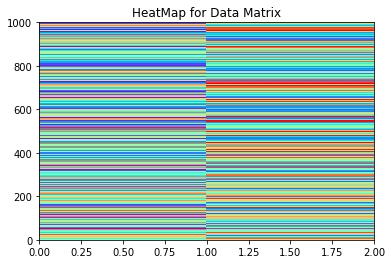

In [ ]:
plt.subplot(1,1,1)
plt.pcolormesh(data_matrix, cmap = 'rainbow')
plt.title('HeatMap for Data Matrix')

Text(0.5, 1.0, 'HeatMap for Basis Matrix')

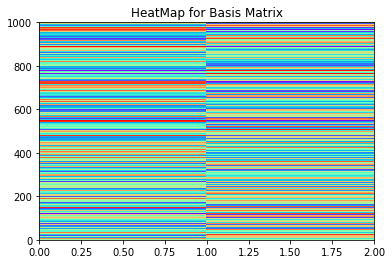

In [ ]:
plt.subplot(1,1,1)
plt.pcolormesh(W, cmap = 'rainbow')
plt.title('HeatMap for Basis Matrix')

Text(0.5, 1.0, 'HeatMap for Coefficient Matrix')

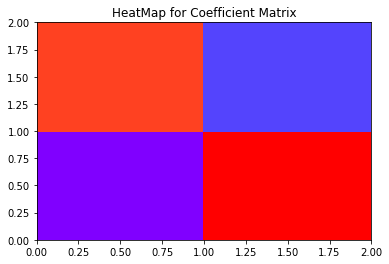

In [ ]:
plt.subplot(1,1,1)
plt.pcolormesh(H, cmap = 'rainbow')
plt.title('HeatMap for Coefficient Matrix')

In [ ]:
H

array([[ 7.09272177, 40.47053952],
       [37.66487532, 10.07947572]])